In [23]:
import pandas as pd
import os
from matplotlib import pyplot as plt


Результаты регрессии:
63.8 torr: ln(V) = (-0.00300 ± 0.00000)·t + 2.88829
146.3 torr: ln(V) = (-0.00142 ± 0.00000)·t + 2.81155
45 torr: ln(V) = (-0.00407 ± 0.00000)·t + 2.72697
123.7 torr: ln(V) = (-0.00161 ± 0.00000)·t + 2.72328
102.8 torr: ln(V) = (-0.00197 ± 0.00000)·t + 2.80185
82.5 torr: ln(V) = (-0.00233 ± 0.00000)·t + 2.79302


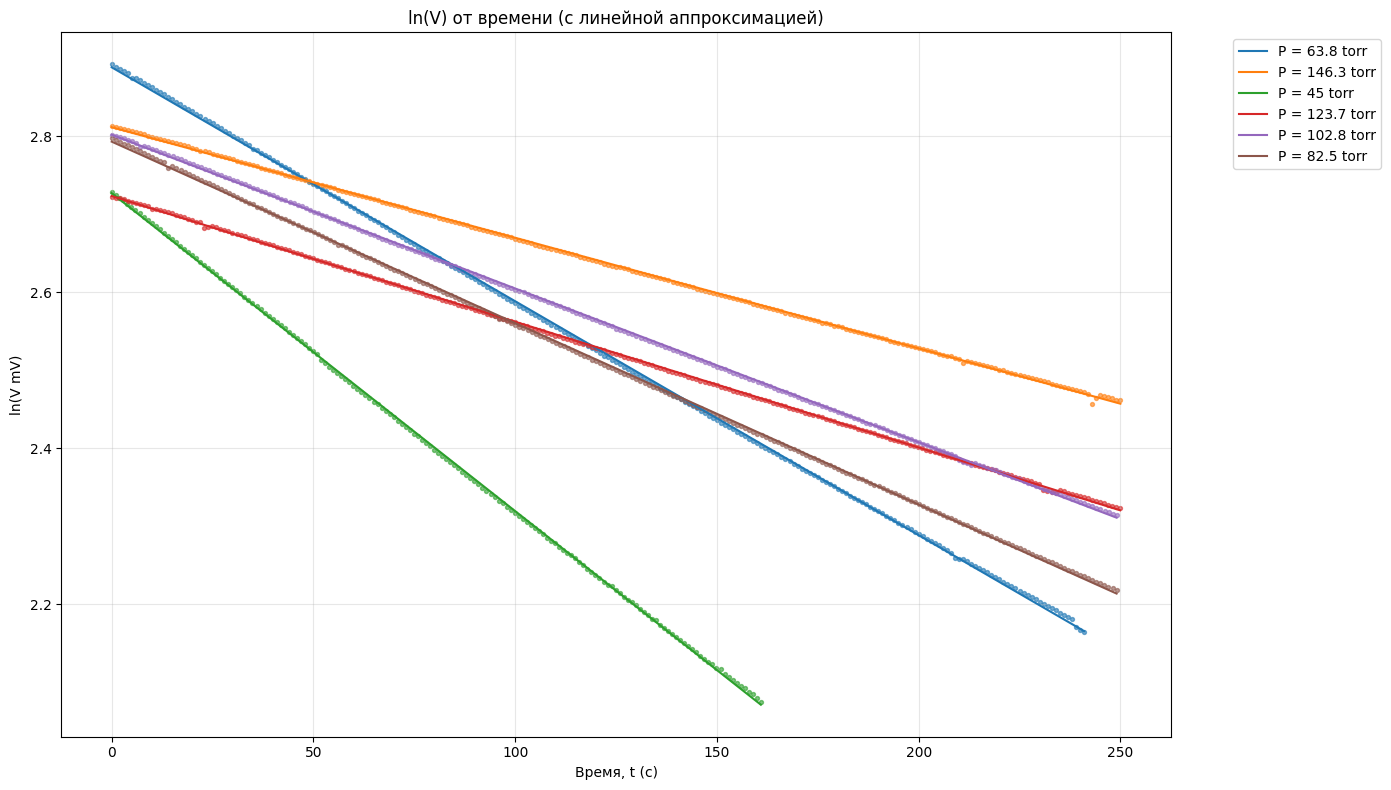

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder_path = '221'
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

plt.figure(figsize=(14, 8))
color_cycle = iter(plt.rcParams['axes.prop_cycle'])  # Цикл цветов

results = {}

for file in files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path, header=0, names=['t', 'V'])
    
    data_filtered = data[data['t'] <= 250]
    
    t = data_filtered['t'].values
    v = data_filtered['V'].values
    ln_v = np.log(v)
    label = file.split('_')[-1].replace('.csv', '')
    
    slope, intercept = np.polyfit(t, ln_v, 1)
    predicted = slope * t + intercept
    
    residuals = ln_v - predicted
    n = len(t)
    mse = np.sum(residuals**2) / (n - 2) if n > 2 else np.nan
    S_xx = np.sum((t - np.mean(t))**2)
    slope_error = np.sqrt(mse / S_xx) if S_xx != 0 else np.nan
    
    results[label] = (slope, intercept, slope_error)
    
    color = next(color_cycle)['color']  # Один цвет на файл
    plt.scatter(t, ln_v, s=8, alpha=0.6, color=color)
    plt.plot(t, predicted, lw=1.5, color=color, label=f'P = {label} torr')

plt.xlabel('Время, t (с)')
plt.ylabel('ln(V mV)')
plt.title('ln(V) от времени (с линейной аппроксимацией)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

print("\nregressions :")
for label, (slope, intercept, err) in results.items():
    print(f"{label} torr: ln(V) = ({slope:.5f} ± {err:.5f})·t + {intercept:.5f}")

plt.show()


Результаты расчета D:
0.016 +- 0.00012: 5.666 ± 0.149
0.007 +- 0.00002: 2.679 ± 0.070
0.022 +- 0.00025: 7.700 ± 0.202
0.008 +- 0.00003: 3.045 ± 0.080
0.010 +- 0.00005: 3.724 ± 0.098
0.012 +- 0.00007: 4.395 ± 0.115
slope: 361.9683508630402 +- 16.72246746332475


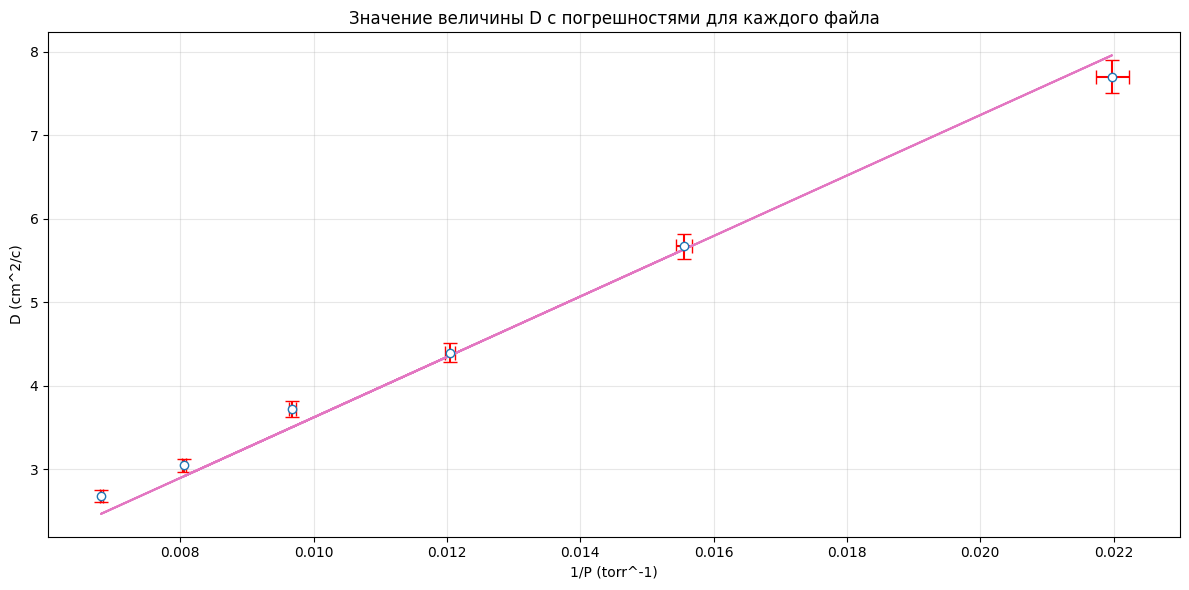

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

V = 420
sigma_V = 10
L_S = 9
sigma_L_S = 0.1

D_values = []
sigma_D_values = []
sigma_1_P_values = []
labels = []

for label, (slope, _, _) in results.items():
    D = abs(slope * V * L_S / 2)
    D_values.append(D)
    
    rel_error_V = (sigma_V / V) ** 2
    rel_error_L_S = (sigma_L_S / L_S) ** 2
    sigma_D = D * np.sqrt(rel_error_V + rel_error_L_S)
    sigma_D_values.append(sigma_D)
    
    sigma_1_P_values.append(0.5/float(label)**2)
    labels.append(1/(float(label) + 0.5))

plt.figure(figsize=(12, 6))
plt.errorbar(labels, D_values, yerr=sigma_D_values, xerr=sigma_1_P_values, fmt='o', capsize=5, 
            markersize=6, ecolor='red', elinewidth=1.5, mfc='white')

plt.xlabel('1/P (torr^-1)')
plt.ylabel('D (cm^2/c)')
plt.title('D per file')
plt.grid(True, alpha=0.3)
plt.tight_layout()

slope, intercept = np.polyfit(labels, D_values, 1)


### INTERSECT 0
slope = np.sum(np.array(labels) * np.array(D_values)) / np.sum(np.array(labels)**2)
intercept = 0


predicted = slope * np.array(labels) + intercept

residuals = D_values - predicted
n = len(labels)
mse = np.sum(residuals**2) / (n - 2) if n > 2 else np.nan
S_xx = np.sum((labels - np.mean(labels))**2)
slope_error = np.sqrt(mse / S_xx) if S_xx != 0 else np.nan



results[label] = (slope, intercept, slope_error)

color = next(color_cycle)['color']  # Один цвет на файл
plt.plot(labels, predicted, lw=1.5, color=color, label=f'{label}')


print("\nD values:")
for label, D, sigma_D, sp in zip(labels, D_values, sigma_D_values, sigma_1_P_values):
    print(f"{label:.3f} +- {sp:.5f}: {D:.3f} ± {sigma_D:.3f}")

print('slope:', slope, "+-", slope_error)
plt.show()

In [26]:
d = slope / 760
d_err = slope_error / 760

print(d, '+-', d_err)

fp = 3 * d * np.sqrt(np.pi * 4 / (8 * 8.31 * 296 * 1000))
sigma_fp = 3 * d_err * np.sqrt(np.pi * 4 / (8 * 5.31 * 296))

print('free path:', fp*100, '+-', sigma_fp*100)



0.47627414587242134 +- 0.02200324666226941
free path: 0.11418047165895324 +- 0.20867712490723248
